## Definición del problema

Desarrollar un modelo de regresión para el precio de una laptop.

Dataset: https://www.kaggle.com/datasets/muhammetvarl/laptop-price

## Carga de datos

In [ ]:
import warnings
warnings.simplefilter(action="ignore")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/laptop_price.csv', encoding='latin-1')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


## Preprocesamiento y limpieza de datos

In [ ]:
df = df.drop('laptop_ID', axis=1)
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


El conjunto de datos no contiene datos nulos.

In [ ]:
df.describe()

,Inches,Price_euros
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


In [ ]:
filas_duplicadas = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {filas_duplicadas}")

Cantidad de filas duplicadas: 28


Contiene datos duplicados, se procede a eliminarlos.

In [ ]:
df = df.drop_duplicates()

In [ ]:
filas_duplicadas = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {filas_duplicadas}")

Cantidad de filas duplicadas: 0


In [ ]:
df['Company'].value_counts(dropna=False)

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,152
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [ ]:
df['Product'].value_counts()

,count
Product,
XPS 13,30
Inspiron 3567,25
250 G6,21
Vostro 3568,19
Legion Y520-15IKBN,19
...,...
VivoBook E201NA,1
Ideapad 520-15IKBR,1
Thinkpad X260,1


Se procede a eliminar la columna 'Product' porque tiene mas de 600 valores únicos.

In [ ]:
df = df.drop('Product', axis=1)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,707
Gaming,205
Ultrabook,194
2 in 1 Convertible,117
Workstation,29
Netbook,23


Trasnformamos las variables categóricas 'Company' y 'TypeName'.

In [ ]:
df = pd.get_dummies(df, columns=['Company', 'TypeName'], drop_first=True, dtype=int)
df.head()

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Company_Apple,...,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,1,...,0,0,0,0,0,0,0,0,1,0
1,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1,...,0,0,0,0,0,0,0,0,1,0
2,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,...,0,0,0,0,0,0,0,1,0,0
3,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,1,...,0,0,0,0,0,0,0,0,1,0
4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,505
1366x768,263
IPS Panel Full HD 1920x1080,226
IPS Panel Full HD / Touchscreen 1920x1080,51
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


Se extrae el ancho y alto de la resolución de pantalla.

In [ ]:
df[['Resolution_Width', 'Resolution_Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype(int)
df[['ScreenResolution', 'Resolution_Width', 'Resolution_Height']].head()

,ScreenResolution,Resolution_Width,Resolution_Height
0,IPS Panel Retina Display 2560x1600,2560,1600
1,1440x900,1440,900
2,Full HD 1920x1080,1920,1080
3,IPS Panel Retina Display 2880x1800,2880,1800
4,IPS Panel Retina Display 2560x1600,2560,1600


In [ ]:
df = df.drop(columns=['ScreenResolution'])
df.head()

,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Company_Apple,Company_Asus,...,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Resolution_Width,Resolution_Height
0,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,1,0,...,0,0,0,0,0,0,1,0,2560,1600
1,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1,0,...,0,0,0,0,0,0,1,0,1440,900
2,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,...,0,0,0,0,0,1,0,0,1920,1080
3,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,1,0,...,0,0,0,0,0,0,1,0,2880,1800
4,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,1,0,...,0,0,0,0,0,0,1,0,2560,1600


De la columna 'Cpu' se va extraer la marca y la frecuencia en GHz.

In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,132
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i5 2.9GHz,1


In [ ]:
df['Cpu_Brand'] = df['Cpu'].str.split().str[0]
df['Cpu_Frequency'] = df['Cpu'].str.split().str[-1].str.replace('GHz', '').astype(float)

df = df.drop(columns=['Cpu'])
df[['Cpu_Brand', 'Cpu_Frequency']].head()

,Cpu_Brand,Cpu_Frequency
0,Intel,2.3
1,Intel,1.8
2,Intel,2.5
3,Intel,2.7
4,Intel,3.1


Se extrae el 'GB' y se convierte en enteros todos los valores de la columna 'Ram'.

In [ ]:
df['Ram'].value_counts()

,count
Ram,
8GB,613
4GB,367
16GB,198
6GB,35
12GB,25
32GB,17
2GB,16
24GB,3
64GB,1


In [ ]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Ram'].head()

,Ram
0,8
1,8
2,8
3,16
4,8


Se extrae la cantidad y tipo de la columna 'Memory'.

In [ ]:
df['Memory_Amount'] = df['Memory'].str.extract(r'(\d+(?:\.\d+)?(?:TB|GB))')
df['Memory_Type'] = df['Memory'].str.extract(r'(SSD|HDD|Hybrid|Flash Storage)')

df[['Memory', 'Memory_Amount', 'Memory_Type']]

,Memory,Memory_Amount,Memory_Type
0,128GB SSD,128GB,SSD
1,128GB Flash Storage,128GB,Flash Storage
2,256GB SSD,256GB,SSD
3,512GB SSD,512GB,SSD
4,256GB SSD,256GB,SSD
...,...,...,...
1270,128GB SSD,128GB,SSD
1271,512GB SSD,512GB,SSD
1272,64GB Flash Storage,64GB,Flash Storage
1273,1TB HDD,1TB,HDD


In [ ]:
df = df.drop(columns=['Memory'])
df['Memory_Amount'].value_counts()

,count
Memory_Amount,
256GB,508
1TB,232
128GB,175
512GB,136
500GB,124
32GB,43
2TB,16
64GB,15
16GB,10


Todos las valores de la columna 'Memory_Amount' se convierten en GB y estarán en valor númerico.

In [ ]:
def convert_to_gb(memory):
    if 'TB' in memory:
        return float(memory.replace('TB', '')) * 1024
    elif 'GB' in memory:
        return float(memory.replace('GB', ''))
    return None

df['Memory_Amount'] = df['Memory_Amount'].apply(convert_to_gb)
df['Memory_Amount']

,Memory_Amount
0,128.0
1,128.0
2,256.0
3,512.0
4,256.0
...,...
1270,128.0
1271,512.0
1272,64.0
1273,1024.0


In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,279
Intel HD Graphics 520,181
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


Se extrae la marca de la GPU.

In [ ]:
df['Gpu_Brand'] = df['Gpu'].str.split().str[0]
df = df.drop(columns=['Gpu'])
df['Gpu_Brand']

,Gpu_Brand
0,Intel
1,Intel
2,Intel
3,AMD
4,Intel
...,...
1270,Intel
1271,Intel
1272,Intel
1273,AMD


En la columna 'Weight', se quita el 'Kg' y los valores será valores númericos.

In [ ]:
df['Weight'].value_counts()

,count
Weight,
2.2kg,117
2.1kg,58
2.4kg,42
2.5kg,38
2.3kg,37
...,...
1.14kg,1
3.8kg,1
1.19kg,1


In [ ]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
df['Weight']

,Weight
0,1.37
1,1.34
2,1.86
3,1.83
4,1.37
...,...
1270,1.80
1271,1.30
1272,1.50
1273,2.19


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

print("Columnas categóricas:")
print(categorical_columns)

print("\nValores únicos por columna categórica:")
for col in categorical_columns:
    print(f"\n{col}:")
    print(df[col].unique())

Columnas categóricas:
Index(['OpSys', 'Cpu_Brand', 'Memory_Type', 'Gpu_Brand'], dtype='object')

Valores únicos por columna categórica:

OpSys:
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']

Cpu_Brand:
['Intel' 'AMD' 'Samsung']

Memory_Type:
['SSD' 'Flash Storage' 'HDD' 'Hybrid']

Gpu_Brand:
['Intel' 'AMD' 'Nvidia' 'ARM']


Transformamos las variables categóricas restantes.

In [ ]:
df = pd.get_dummies(df, columns=['OpSys', 'Cpu_Brand', 'Memory_Type', 'Gpu_Brand'], drop_first=True, dtype=int)
df.head()

,Inches,Ram,Weight,Price_euros,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,OpSys_Windows 7,OpSys_macOS,Cpu_Brand_Intel,Cpu_Brand_Samsung,Memory_Type_HDD,Memory_Type_Hybrid,Memory_Type_SSD,Gpu_Brand_ARM,Gpu_Brand_Intel,Gpu_Brand_Nvidia
0,13.3,8,1.37,1339.69,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
1,13.3,8,1.34,898.94,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,15.6,8,1.86,575.00,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,15.4,16,1.83,2537.45,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
4,13.3,8,1.37,1803.60,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1275 entries, 0 to 1274
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Inches                1275 non-null   float64
 1   Ram                   1275 non-null   int64  
 2   Weight                1275 non-null   float64
 3   Price_euros           1275 non-null   float64
 4   Company_Apple         1275 non-null   int64  
 5   Company_Asus          1275 non-null   int64  
 6   Company_Chuwi         1275 non-null   int64  
 7   Company_Dell          1275 non-null   int64  
 8   Company_Fujitsu       1275 non-null   int64  
 9   Company_Google        1275 non-null   int64  
 10  Company_HP            1275 non-null   int64  
 11  Company_Huawei        1275 non-null   int64  
 12  Company_LG            1275 non-null   int64  
 13  Company_Lenovo        1275 non-null   int64  
 14  Company_MSI           1275 non-null   int64  
 15  Company_Mediacom      1275

Se calcula la correlación entre las variables numéricas y la variable objetivo (Price_euros).

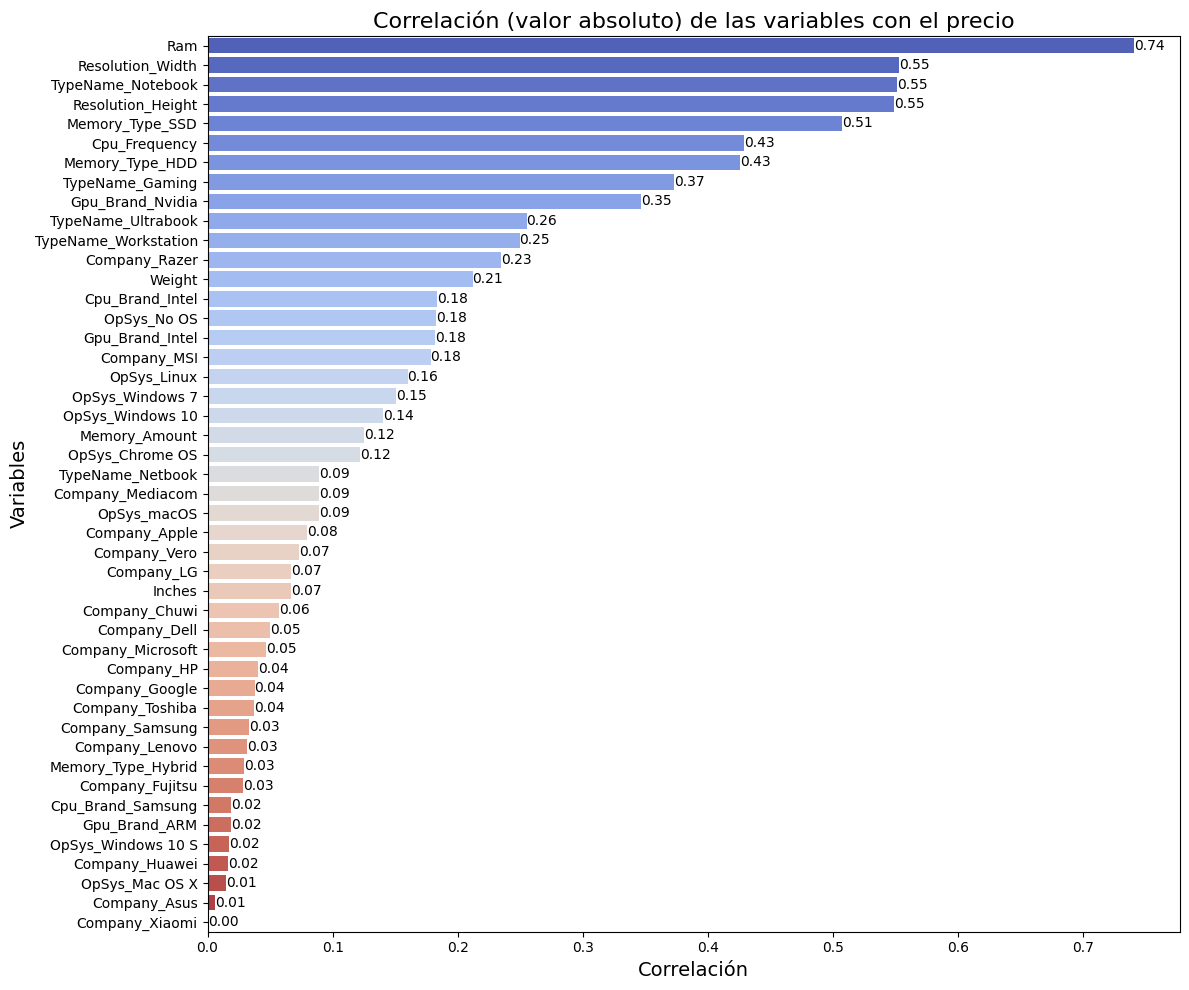

In [ ]:
correlation = df.corr()['Price_euros'].apply(abs).sort_values(ascending=False)
correlation = correlation[1:]

plt.figure(figsize=(12, 10))
sns.barplot(x=correlation.values, y=correlation.index, palette="coolwarm")

for index, value in enumerate(correlation.values):
    plt.text(value, index, f"{value:.2f}", va='center', ha='left', fontsize=10)

plt.title("Correlación (valor absoluto) de las variables con el precio", fontsize=16)
plt.xlabel("Correlación", fontsize=14)
plt.ylabel("Variables", fontsize=14)

plt.axvline(0, color="black", linewidth=0.7, linestyle="--")

plt.tight_layout()
plt.show()


Se decide almacenar las características que tienen una correlación mayor a 0.15.

In [ ]:
important_columns = correlation[correlation > 0.15].index.tolist()
print(important_columns)

['Ram', 'Resolution_Width', 'TypeName_Notebook', 'Resolution_Height', 'Memory_Type_SSD', 'Cpu_Frequency', 'Memory_Type_HDD', 'TypeName_Gaming', 'Gpu_Brand_Nvidia', 'TypeName_Ultrabook', 'TypeName_Workstation', 'Company_Razer', 'Weight', 'Cpu_Brand_Intel', 'OpSys_No OS', 'Gpu_Brand_Intel', 'Company_MSI', 'OpSys_Linux', 'OpSys_Windows 7']


In [ ]:
len(important_columns)

19

## Modelamiento

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df[important_columns]
y = df['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [ ]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('XGBoost Regressor', xgb.XGBRegressor(n_estimators=100, random_state=42)),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regressor', KNeighborsRegressor(n_neighbors=5)),
    ('ElasticNet', ElasticNet(alpha=1.0, l1_ratio=0.5)),
]

results = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append([name, rmse, r2])

results = pd.DataFrame(results, columns=['Model', 'RMSE', 'R2'])
print(results)

                           Model        RMSE        R2
0              Linear Regression  351.330517  0.751313
1        Random Forest Regressor  289.901125  0.830675
2    Gradient Boosting Regressor  276.165877  0.846340
3              XGBoost Regressor  273.799869  0.848961
4      Support Vector Regression  701.270087  0.009186
5  K-Nearest Neighbors Regressor  375.763050  0.715521
6                     ElasticNet  367.501152  0.727894


- Los modelos 'XGBoost' y 'Gradient Boosting' tiene los mejores resultados tanto en RMSE como en R².
- 'Random Forest' también tiene buenos resultados, pero está ligeramente detrás de 'XGBoost' y 'Gradient Boosting'.